In [1]:
import numpy as np
import matplotlib
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import imageio
import math
import skimage as sk

# Méthode de transfert de l'article *Color Transfer between images* de Erik Reinhard, Michael Ashikhmin, Bruce Gooch, et Peter Shirley 

In [2]:
def transfer(imgIn, imgRef):
    for k in range(10):
        meanIn0 = np.mean(imgIn[k][:,:,0])
        meanIn1 = np.mean(imgIn[k][:,:,1])
        meanIn2 = np.mean(imgIn[k][:,:,2])
        meanRef0 = np.mean(imgRef[k][:,:,0])
        meanRef1 = np.mean(imgRef[k][:,:,1])
        meanRef2 = np.mean(imgRef[k][:,:,2])

        stdIn0 = np.std(imgIn[k][:,:,0])
        stdIn1 = np.std(imgIn[k][:,:,1])
        stdIn2 = np.std(imgIn[k][:,:,2])
        stdRef0 = np.std(imgRef[k][:,:,0])
        stdRef1 = np.std(imgRef[k][:,:,1])
        stdRef2 = np.std(imgRef[k][:,:,2])

        for i in range(imgIn[k].shape[0]):
            for j in range(imgIn[k].shape[1]):
                tmp = imgIn[k][i][j]
                tmp[0] = (tmp[0] - meanIn0) * (stdRef0 / stdIn0) + meanRef0
                tmp[1] = (tmp[1] - meanIn1) * (stdRef1 / stdIn1) + meanRef1
                tmp[2] = (tmp[2] - meanIn2) * (stdRef2 / stdIn2) + meanRef2
                imgIn[k][i][j] = tmp

# Premier test
En convertissant d'abord l'image en LAB

In [3]:
#charger les images
imgIn = []
imgRef = []

for i in range(10):    
    img1 = np.array(mpimg.imread('img/'+str(i)+'_in.jpg'))
    img2 = np.array(mpimg.imread('img/'+str(i)+'_ref.jpg'))
    
    #passage de rgb en lab
    img1 = sk.color.rgb2lab(img1)
    img2 = sk.color.rgb2lab(img2)
    imgIn.append(img1)
    imgRef.append(img2)  

In [4]:
transfer(imgIn, imgRef)

In [5]:
for i in range(10):    
    #passage de lab en rgb
    imgIn[i] = sk.color.lab2rgb(imgIn[i])
    imgRef[i] = sk.color.lab2rgb(imgRef[i]) 
    
    mpimg.imsave('img/res/LAB_'+str(i)+'.jpg',imgIn[i])

C:\Users\UTILISATEUR\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 5424 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


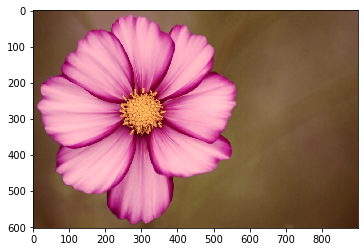

In [6]:
#affichage d'un résultat
plt.imshow(imgIn[0])
plt.show()

# Deuxième test
En convertissant d'abord l'image en XYZ

In [7]:
#charger les images
imgIn = []
imgRef = []

for i in range(10):    
    img1 = np.array(mpimg.imread('img/'+str(i)+'_in.jpg'))
    img2 = np.array(mpimg.imread('img/'+str(i)+'_ref.jpg'))
    
    #passage de rgb en xyz
    img1 = sk.color.rgb2xyz(img1)
    img2 = sk.color.rgb2xyz(img2)
    imgIn.append(img1)
    imgRef.append(img2)

In [8]:
transfer(imgIn, imgRef)

In [9]:
for i in range(10):    
    #passage de xyz en rgb
    imgIn[i] = sk.color.xyz2rgb(imgIn[i])
    imgRef[i] = sk.color.xyz2rgb(imgRef[i]) 
    
    mpimg.imsave('img/res/XYZ_'+str(i)+'.jpg',imgIn[i])

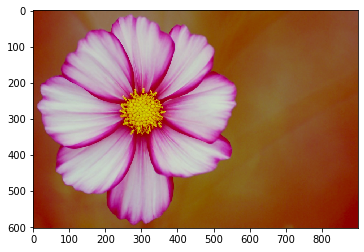

In [10]:
#affichage d'un résultat
plt.imshow(imgIn[0])
plt.show()

# Troisième test
Directement en RGB

In [11]:
#charger les images
imgIn = []
imgRef = []

for i in range(10):    
    img1 = np.array(mpimg.imread('img/'+str(i)+'_in.jpg'))
    img2 = np.array(mpimg.imread('img/'+str(i)+'_ref.jpg'))

    imgIn.append(img1)
    imgRef.append(img2)

In [12]:
transfer(imgIn, imgRef)

In [13]:
for i in range(10):     
    mpimg.imsave('img/res/RGB_'+str(i)+'.jpg',imgIn[i])

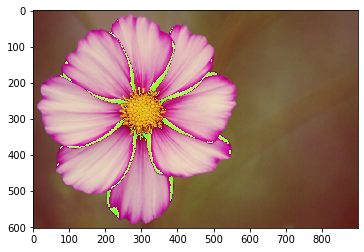

In [14]:
#affichage d'un résultat
plt.imshow(imgIn[0])
plt.show()

# Comparaison

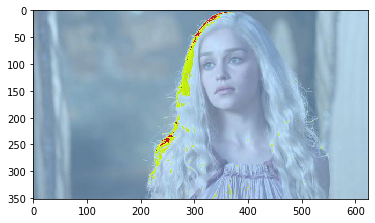

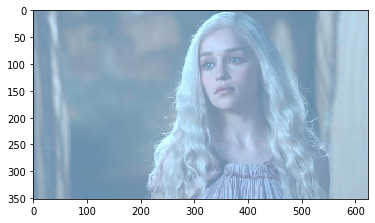

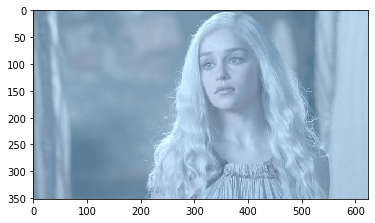

In [18]:
num = 
imgRGB = np.array(mpimg.imread('img/res/RGB_'+str(num)+'.jpg'))
imgXYZ = np.array(mpimg.imread('img/res/XYZ_'+str(num)+'.jpg'))
imgLAB = np.array(mpimg.imread('img/res/LAB_'+str(num)+'.jpg'))

plt.imshow(imgRGB)
plt.show()
plt.imshow(imgXYZ)
plt.show()
plt.imshow(imgLAB)
plt.show()

## Conclusion
Sans conversion vers un autre espace de couleur, le résultat n'est pas correct et possède plusieurs zones d'erreurs, sauf dans certains cas (par exemple : le résultat obtenu avec les images 4). Avec une conversion vers l'espace XYZ ou LAB, le résultat est meilleur, il n'y a pas de zones erronées. Cependant, avec l'espace XYZ, les images semblent plus ternes.